<a href="https://colab.research.google.com/github/CHADHURBALA/Digital-Image-Processing/blob/main/Thresholding_Morphological__Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

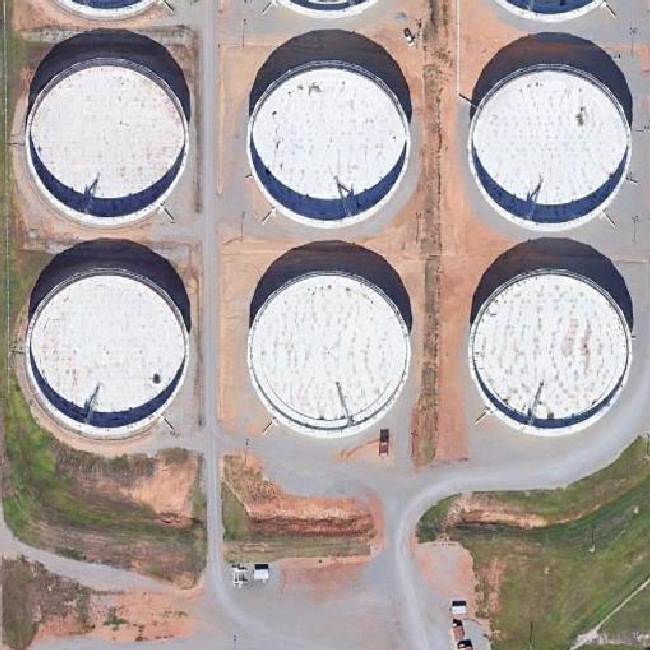

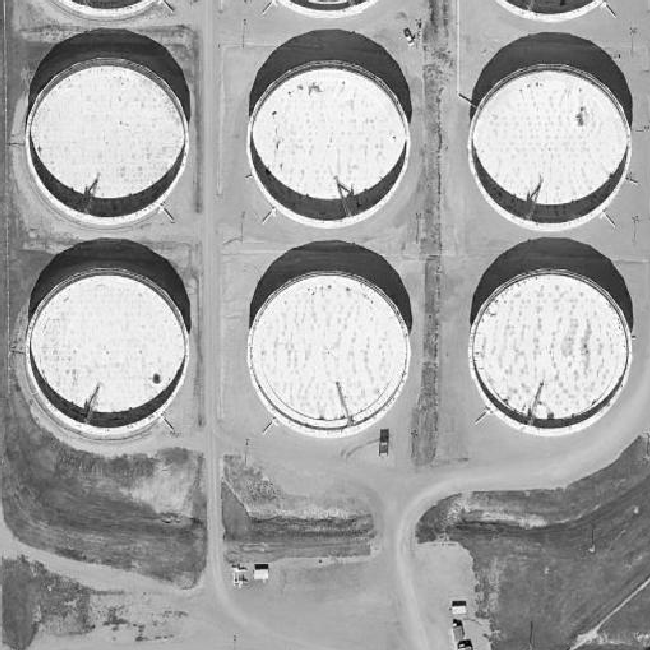

In [ ]:
# Thresholding and Morphological Processing
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

imag = 'tank.png'
img = cv2.imread(imag)
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(imgg)

In [ ]:
# Adaptive thresholding - mean

m_1 = cv2.adaptiveThreshold(imgg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

m_2 = cv2.adaptiveThreshold(imgg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 5)






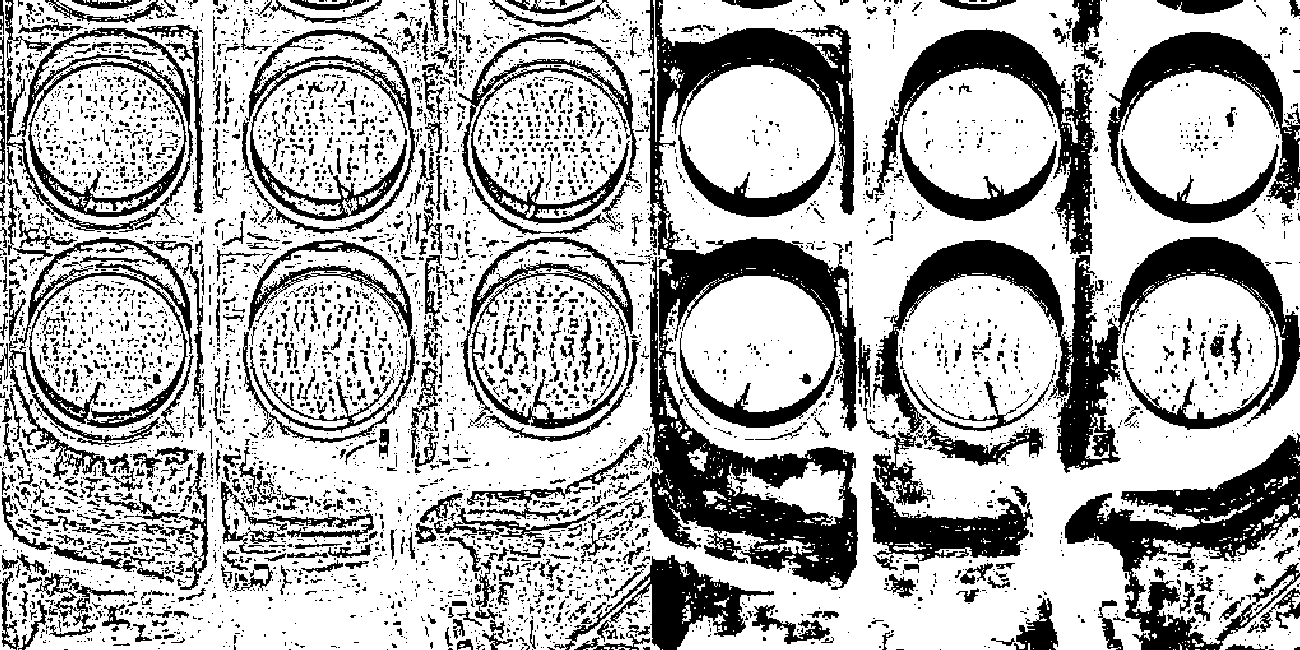

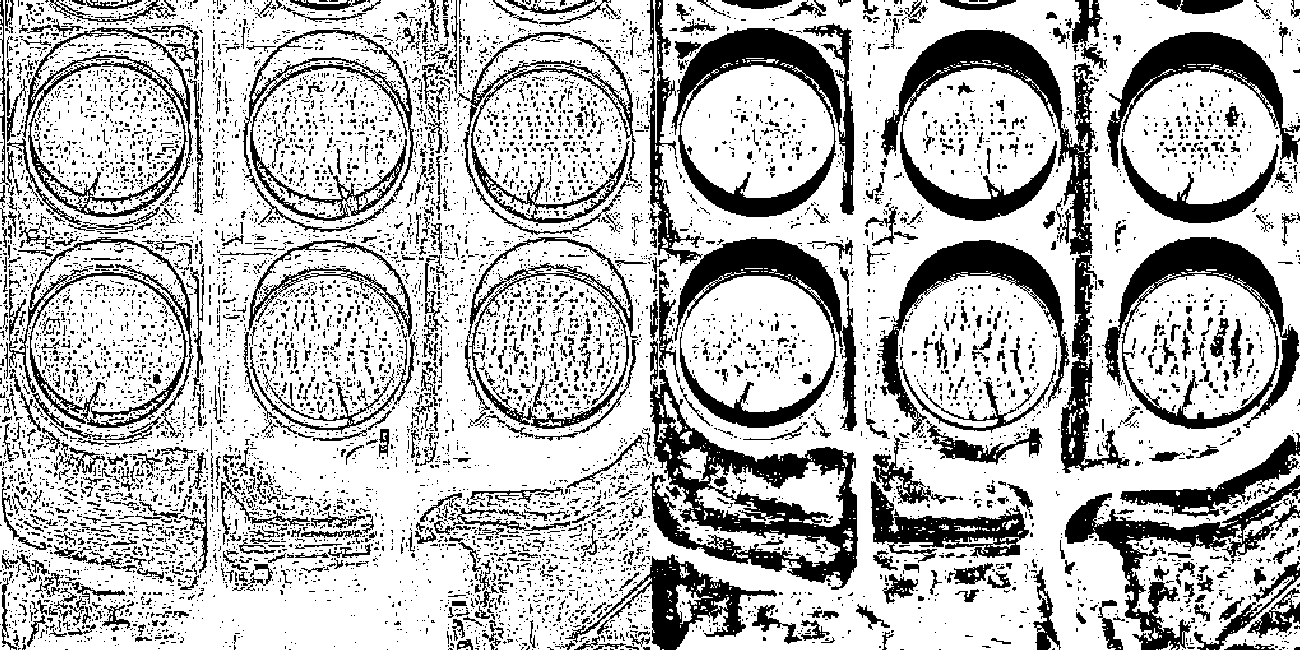

In [ ]:
# Adaptive thresholding - gaussian

g_1 = cv2.adaptiveThreshold(imgg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)

g_2 = cv2.adaptiveThreshold(imgg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 5)

cv2_imshow(np.hstack((m_1, m_2)))
cv2_imshow(np.hstack((g_1, g_2)))

In [ ]:
# Global Thresholding - Otsu

ret, o_1 = cv2.threshold(imgg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

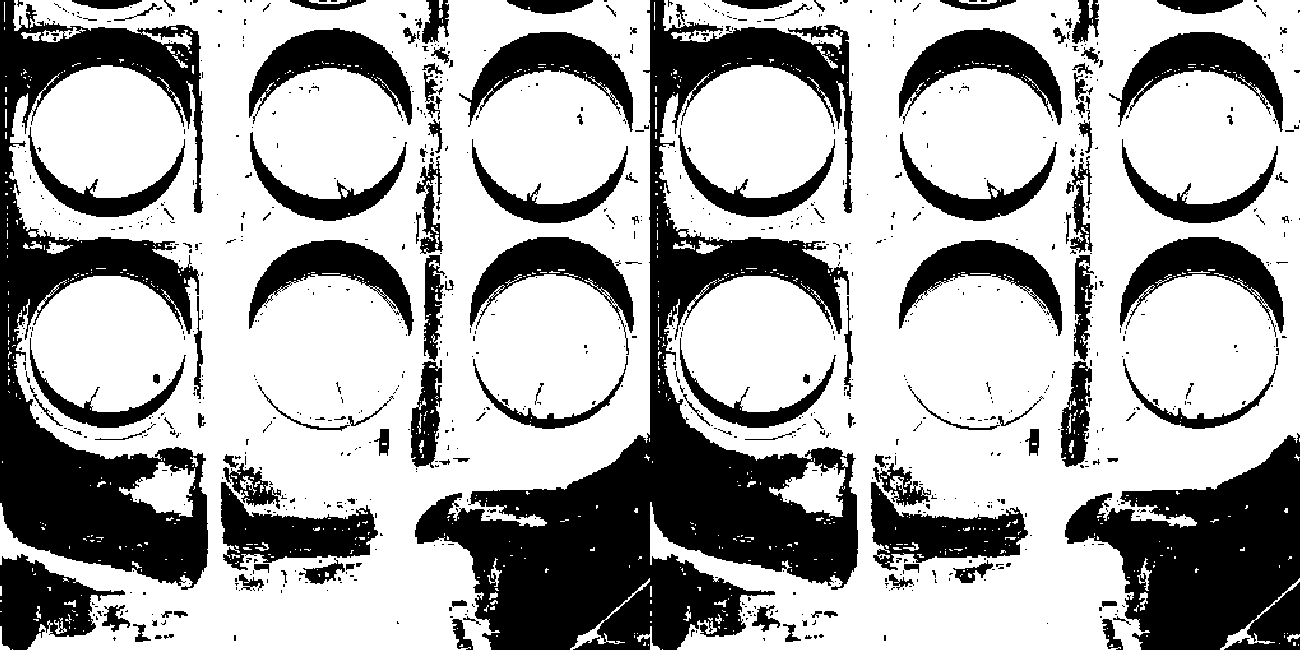

In [ ]:
# Global Thresholding - Triangle

ret, t_1 = cv2.threshold(imgg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

cv2_imshow(np.hstack((o_1, t_1)))


In [ ]:
def neg(image):
  return np.array(255-image, dtype = 'uint8')


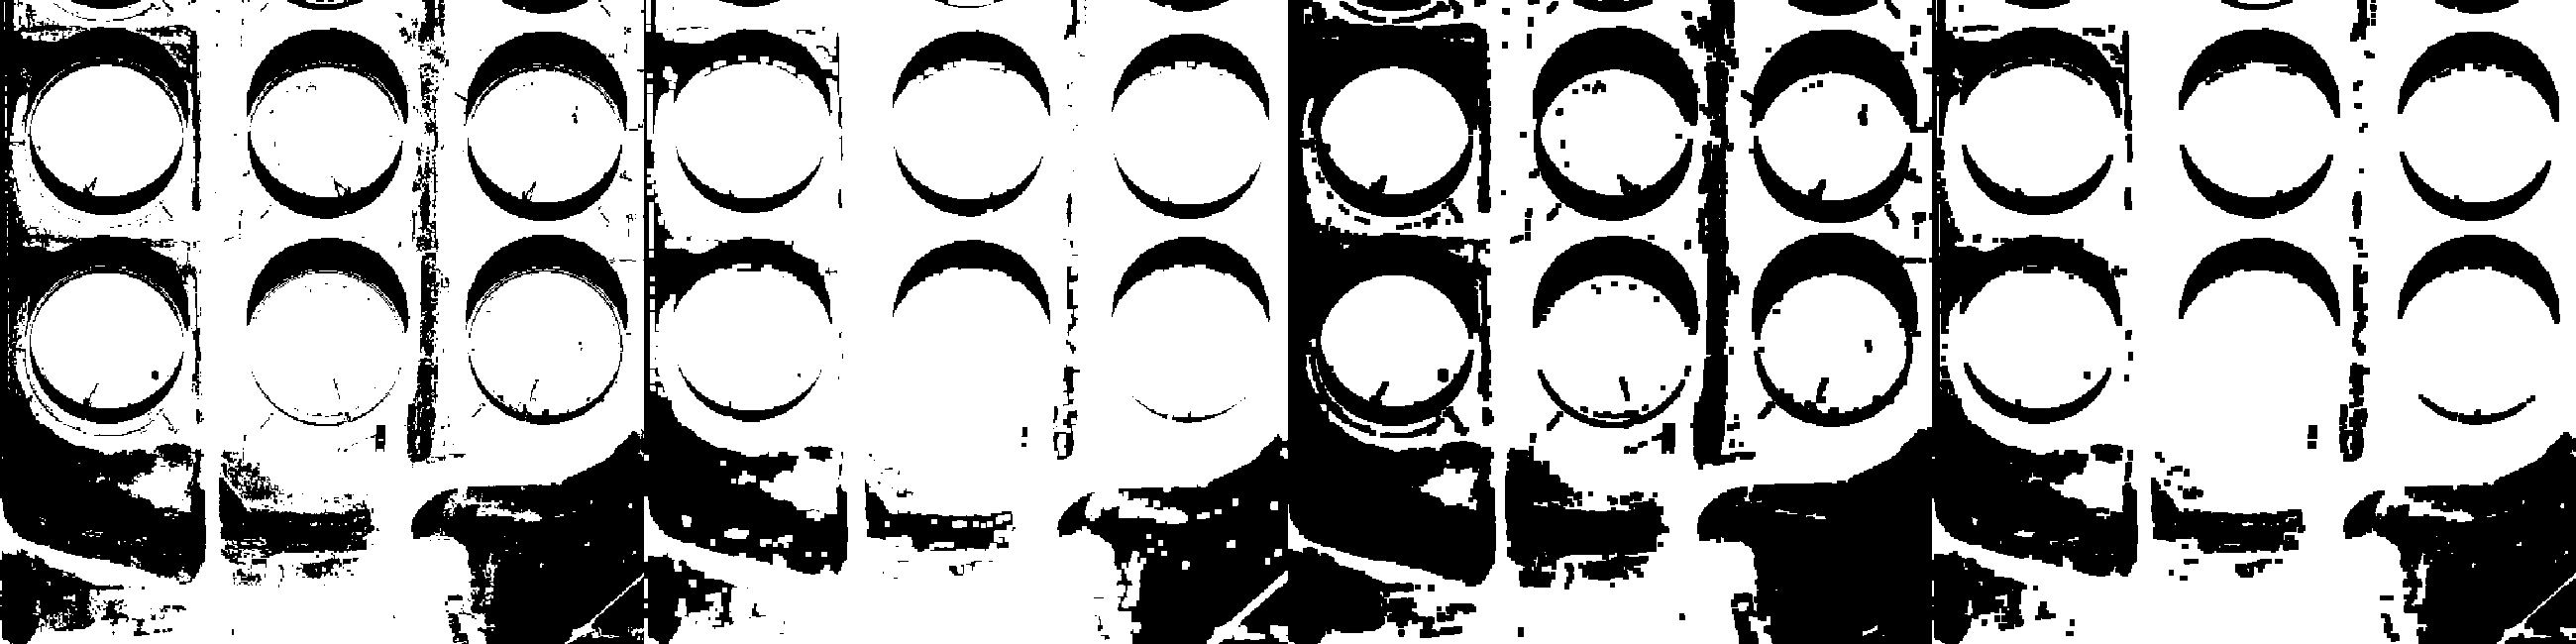

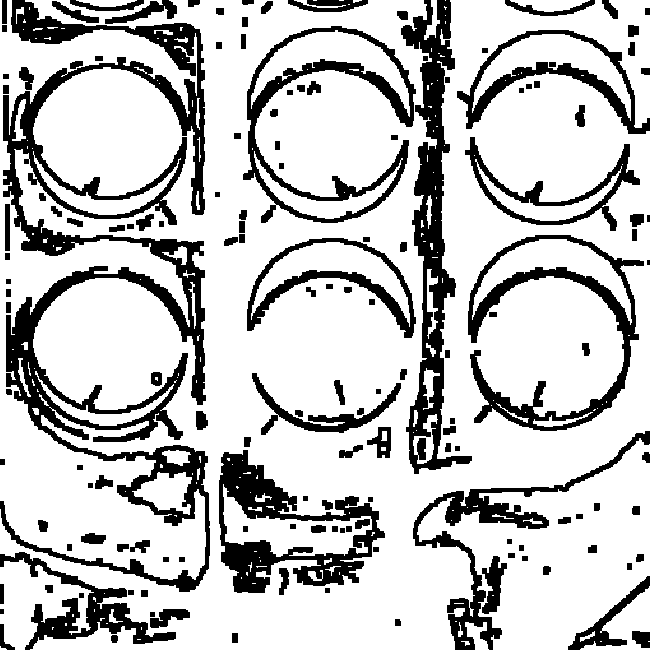

In [ ]:
# Morphological Processing

kernel = np.ones((5,5),np.uint8)
negative_img = np.array(255-o_1, dtype = 'uint8')
i = negative_img
erosion = neg(cv2.erode(i, kernel,iterations = 1))
dilation = neg(cv2.dilate(i, kernel,iterations = 1))
opening = neg(cv2.morphologyEx(i, cv2.MORPH_OPEN, kernel))

gradient = neg(cv2.morphologyEx(i, cv2.MORPH_GRADIENT, kernel))

i = o_1
cv2_imshow(np.hstack((i, erosion, dilation, opening)))
cv2_imshow(gradient)

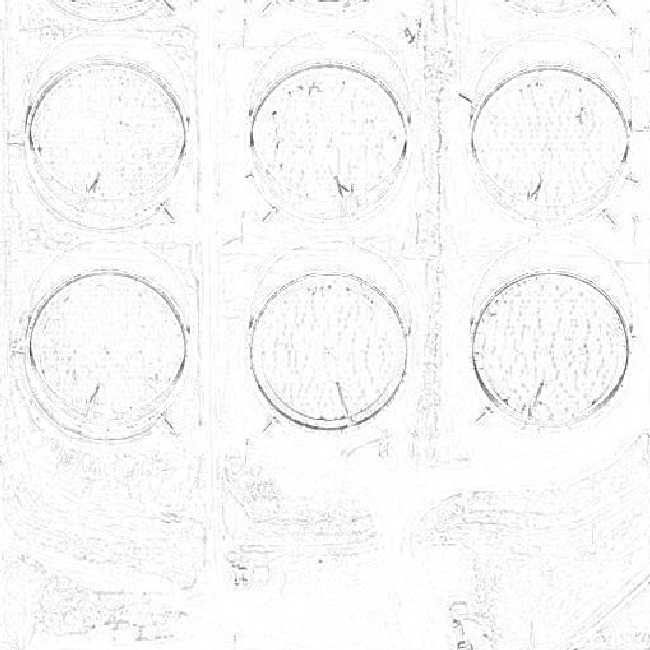

In [ ]:


blackhat = neg(cv2.morphologyEx(imgg, cv2.MORPH_BLACKHAT, kernel))

cv2_imshow(blackhat)
